In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import os
import glob
from time import time
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
dataset = pd.read_csv(r'/content/drive/MyDrive/NBaIotDS/MultiDS/MultiDSShuffled.csv')

In [ ]:
dataset

,Unnamed: 0.1,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,label
0,177744.0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,...,0.000000,0.000000,1.000000,60.00000,0.000000,60.000000,0.000000,0.000000,0.000000,1
1,1781014.0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,...,0.000000,0.000000,1.000000,60.00000,0.000000,60.000000,0.000000,0.000000,0.000000,1
2,909866.0,175.643631,74.057432,1.375073,287.358760,74.055352,1.325384,846.720663,74.050416,4.119962,...,0.000000,0.000000,1.000000,74.00000,0.000000,74.000000,0.000000,0.000000,0.000000,1
3,1291145.0,39.123435,74.231317,24.717050,69.403538,74.549626,295.195439,200.741796,78.166564,3303.551321,...,0.000000,0.000000,1.000000,74.00000,0.000000,74.000000,0.000000,0.000000,0.000000,1
4,NaN,211.427551,72.721415,16.265405,337.713905,72.058241,23.414194,857.618729,71.299322,30.515834,...,0.000000,0.000000,1.000000,74.00000,0.000000,74.000000,0.000000,0.000000,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667791,1855510.0,193.982145,74.733088,186.087555,308.415003,74.776763,196.221110,853.318402,74.604000,219.551339,...,0.000000,0.000000,1.676820,74.00000,0.000000,95.268043,0.000000,0.000000,0.000000,1
1667792,510593.0,100.508137,97.027982,3007.381584,120.367228,97.922939,3224.024617,146.219544,98.744738,3422.757910,...,4.941507,0.057906,92.922723,84.23699,1.985909,120.883916,1839.882017,5.208696,0.061147,0
1667793,1113069.0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,...,0.000000,0.000000,1.000000,60.00000,0.000000,60.000000,0.000000,0.000000,0.000000,1
1667794,NaN,137.269968,60.000000,0.000001,184.187427,60.000029,0.000360,328.319083,60.116098,55.090013,...,0.000000,0.000000,1.000000,60.00000,0.000000,60.000000,0.000000,0.000000,0.000000,2


In [ ]:
dataset.drop('Unnamed: 0.1', axis = 1, inplace = True)

In [ ]:
dataset

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,label
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,60.00000,0.000000,60.000000,0.000000,0.000000,0.000000,1
1,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,60.00000,0.000000,60.000000,0.000000,0.000000,0.000000,1
2,175.643631,74.057432,1.375073,287.358760,74.055352,1.325384,846.720663,74.050416,4.119962,7416.605573,...,0.000000,0.000000,1.000000,74.00000,0.000000,74.000000,0.000000,0.000000,0.000000,1
3,39.123435,74.231317,24.717050,69.403538,74.549626,295.195439,200.741796,78.166564,3303.551321,958.678805,...,0.000000,0.000000,1.000000,74.00000,0.000000,74.000000,0.000000,0.000000,0.000000,1
4,211.427551,72.721415,16.265405,337.713905,72.058241,23.414194,857.618729,71.299322,30.515834,7262.625234,...,0.000000,0.000000,1.000000,74.00000,0.000000,74.000000,0.000000,0.000000,0.000000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667791,193.982145,74.733088,186.087555,308.415003,74.776763,196.221110,853.318402,74.604000,219.551339,7669.768178,...,0.000000,0.000000,1.676820,74.00000,0.000000,95.268043,0.000000,0.000000,0.000000,1
1667792,100.508137,97.027982,3007.381584,120.367228,97.922939,3224.024617,146.219544,98.744738,3422.757910,163.020105,...,4.941507,0.057906,92.922723,84.23699,1.985909,120.883916,1839.882017,5.208696,0.061147,0
1667793,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,60.00000,0.000000,60.000000,0.000000,0.000000,0.000000,1
1667794,137.269968,60.000000,0.000001,184.187427,60.000029,0.000360,328.319083,60.116098,55.090013,2922.456156,...,0.000000,0.000000,1.000000,60.00000,0.000000,60.000000,0.000000,0.000000,0.000000,2


In [ ]:
X, y = dataset.iloc[:, :-1], dataset.iloc[:, -1]

In [ ]:
X

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000,0.000000,1.000000,60.00000,0.000000,60.000000,0.000000,0.000000,0.000000
1,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000,0.000000,1.000000,60.00000,0.000000,60.000000,0.000000,0.000000,0.000000
2,175.643631,74.057432,1.375073,287.358760,74.055352,1.325384,846.720663,74.050416,4.119962,7416.605573,...,0.000000e+00,0.000000,0.000000,1.000000,74.00000,0.000000,74.000000,0.000000,0.000000,0.000000
3,39.123435,74.231317,24.717050,69.403538,74.549626,295.195439,200.741796,78.166564,3303.551321,958.678805,...,0.000000e+00,0.000000,0.000000,1.000000,74.00000,0.000000,74.000000,0.000000,0.000000,0.000000
4,211.427551,72.721415,16.265405,337.713905,72.058241,23.414194,857.618729,71.299322,30.515834,7262.625234,...,0.000000e+00,0.000000,0.000000,1.000000,74.00000,0.000000,74.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1667791,193.982145,74.733088,186.087555,308.415003,74.776763,196.221110,853.318402,74.604000,219.551339,7669.768178,...,9.094947e-13,0.000000,0.000000,1.676820,74.00000,0.000000,95.268043,0.000000,0.000000,0.000000
1667792,100.508137,97.027982,3007.381584,120.367228,97.922939,3224.024617,146.219544,98.744738,3422.757910,163.020105,...,1.847392e+03,4.941507,0.057906,92.922723,84.23699,1.985909,120.883916,1839.882017,5.208696,0.061147
1667793,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000e+00,0.000000,0.000000,1.000000,60.00000,0.000000,60.000000,0.000000,0.000000,0.000000
1667794,137.269968,60.000000,0.000001,184.187427,60.000029,0.000360,328.319083,60.116098,55.090013,2922.456156,...,0.000000e+00,0.000000,0.000000,1.000000,60.00000,0.000000,60.000000,0.000000,0.000000,0.000000


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_validate, learning_curve
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

In [ ]:
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True)
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1_score': make_scorer(f1_score, average='macro')
}

In [ ]:
from lightgbm import LGBMClassifier
LGB_model = LGBMClassifier(random_state = 0)

In [ ]:
results = cross_validate(LGB_model, X, y, cv=num_folds, scoring=scoring)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.109518 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 29325
[LightGBM] [Info] Number of data points in the train set: 1334236, number of used features: 115
[LightGBM] [Info] Start training from score -1.098613
[LightGBM] [Info] Start training from score -1.098613
[LightGBM] [Info] Start training from score -1.098611
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 1.144342 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 29325
[LightGBM] [Info] Number of data points in the train set: 1334237, number of used features: 115
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098614
[LightGBM]

In [ ]:
print("Cross-Validation Scores:")
print("Accuracy Mean:", results['test_accuracy'].mean())
print("Accuracy:", results['test_accuracy'])
print("Precision Mean:", results['test_precision'].mean())
print("Precision:", results['test_precision'])
print("Recall Mean:", results['test_recall'].mean())
print("Recall:", results['test_recall'])
print("F1 Score Mean:", results['test_f1_score'].mean())
print("F1 Score:", results['test_f1_score'])

Cross-Validation Scores:
Accuracy Mean: 0.9999904064966006
Accuracy: [0.999997   0.99999101 1.         0.99997901 0.99998501]
Precision Mean: 0.9999904067302715
Precision: [0.999997   0.99999101 1.         0.99997901 0.99998501]
Recall Mean: 0.9999904064876126
Recall: [0.999997   0.99999101 1.         0.99997901 0.99998501]
F1 Score Mean: 0.9999904064956981
F1 Score: [0.999997   0.99999101 1.         0.99997901 0.99998501]


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.075860 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 29325
[LightGBM] [Info] Number of data points in the train set: 133423, number of used features: 115
[LightGBM] [Info] Start training from score -1.097586
[LightGBM] [Info] Start training from score -1.102404
[LightGBM] [Info] Start training from score -1.095858
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.147410 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 29325
[LightGBM] [Info] Number of data points in the train set: 266847, number of used features: 115
[LightGBM] [Info] Start training from score -

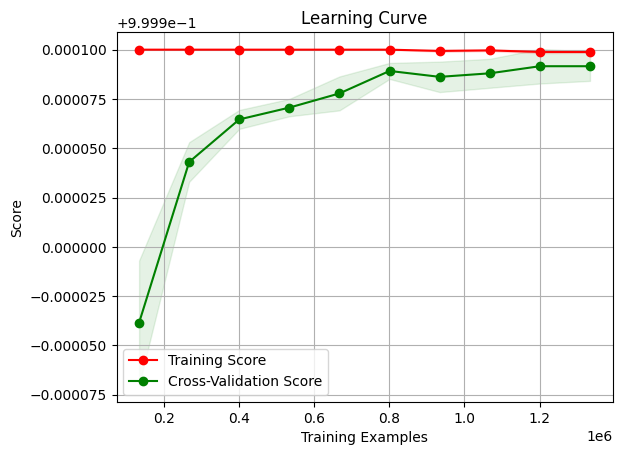

In [ ]:
train_sizes, train_scores, val_scores = learning_curve(LGB_model, X, y, cv=num_folds, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-Validation Score")

plt.legend(loc="best")
plt.show()

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.242476 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29325
[LightGBM] [Info] Number of data points in the train set: 133423, number of used features: 115
[LightGBM] [Info] Start training from score -1.097586
[LightGBM] [Info] Start training from score -1.102404
[LightGBM] [Info] Start training from score -1.095858
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.178966 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 29325
[LightGBM] [Info] Number of data points in the train set: 266847, number of used features: 115
[LightGBM] [Info] Start training from score -1.094954
[LightGBM] [Info] Start training from score -1.102815
[

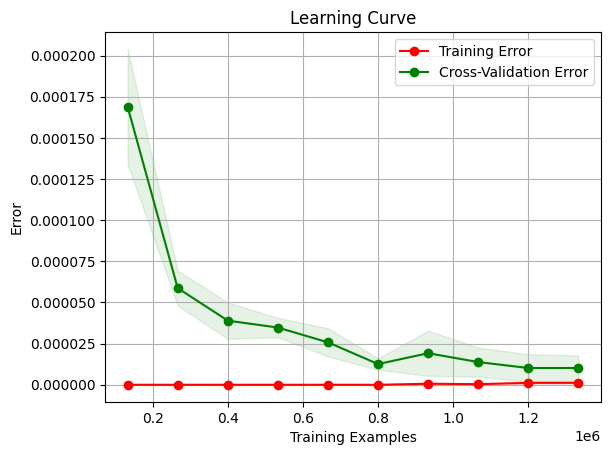

In [ ]:
train_sizes, train_scores, val_scores = learning_curve(LGB_model, X, y, cv=num_folds, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))

train_errors_mean = -np.mean(train_scores, axis=1)
train_errors_std = np.std(train_scores, axis=1)
val_errors_mean = -np.mean(val_scores, axis=1)
val_errors_std = np.std(val_scores, axis=1)

plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Error")

plt.grid()

plt.fill_between(train_sizes, train_errors_mean - train_errors_std, train_errors_mean + train_errors_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, val_errors_mean - val_errors_std, val_errors_mean + val_errors_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_errors_mean, 'o-', color="r", label="Training Error")
plt.plot(train_sizes, val_errors_mean, 'o-', color="g", label="Cross-Validation Error")

plt.legend(loc="best")
plt.show()

In [ ]:
from sklearn.ensemble import HistGradientBoostingClassifier
HGB_model = HistGradientBoostingClassifier(random_state = 0)

In [ ]:
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error


In [ ]:
scoring = {
    'mse': make_scorer(mean_squared_error),
    'mae': make_scorer(mean_absolute_error)
}

In [ ]:
results = cross_validate(HGB_model, X, y, cv=num_folds, scoring=scoring)

In [ ]:
print("Cross-Validation Scores:")
print("Mean Squared Error:", -results['test_mse'].mean())
print("Mean Absolute Error:", -results['test_mae'].mean())


Cross-Validation Scores:
Mean Squared Error: -1.1392285623855817e-05
Mean Absolute Error: -8.993909324610405e-06


In [ ]:
print("Cross-Validation Scores:")
print("Accuracy Mean:", results['test_accuracy'].mean())
print("Accuracy:", results['test_accuracy'])
print("Precision Mean:", results['test_precision'].mean())
print("Precision:", results['test_precision'])
print("Recall Mean:", results['test_recall'].mean())
print("Recall:", results['test_recall'])
print("F1 Score Mean:", results['test_f1_score'].mean())
print("F1 Score:", results['test_f1_score'])

Cross-Validation Scores:
Accuracy Mean: 0.999992205278825
Accuracy: [0.999997   0.999997   0.999997   0.99998201 0.99998801]
Precision Mean: 0.9999922054046486
Precision: [0.999997   0.999997   0.999997   0.99998201 0.99998801]
Recall Mean: 0.9999922052644443
Recall: [0.999997   0.999997   0.999997   0.99998201 0.99998801]
F1 Score Mean: 0.9999922052725315
F1 Score: [0.999997   0.999997   0.999997   0.99998201 0.99998801]


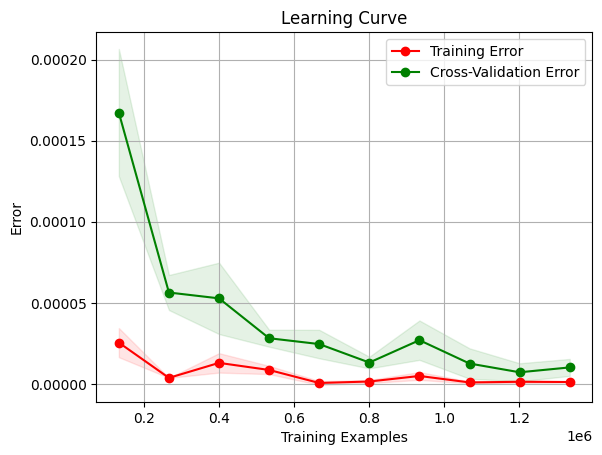

In [ ]:
train_sizes, train_scores, val_scores = learning_curve(HGB_model, X, y, cv=num_folds, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))

train_errors_mean = -np.mean(train_scores, axis=1)
train_errors_std = np.std(train_scores, axis=1)
val_errors_mean = -np.mean(val_scores, axis=1)
val_errors_std = np.std(val_scores, axis=1)

plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Error")

plt.grid()

plt.fill_between(train_sizes, train_errors_mean - train_errors_std, train_errors_mean + train_errors_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, val_errors_mean - val_errors_std, val_errors_mean + val_errors_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_errors_mean, 'o-', color="r", label="Training Error")
plt.plot(train_sizes, val_errors_mean, 'o-', color="g", label="Cross-Validation Error")

plt.legend(loc="best")
plt.show()

In [ ]:
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True)
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1_score': make_scorer(f1_score, average='macro')
}
from sklearn.ensemble import AdaBoostClassifier
Ada_model = AdaBoostClassifier(random_state=0 , n_estimators= 100, learning_rate=0.1)


In [ ]:
results = cross_validate(Ada_model, X, y, cv=num_folds, scoring=scoring)

In [ ]:
print("Cross-Validation Scores:")
print("Accuracy Mean:", results['test_accuracy'].mean())
print("Accuracy:", results['test_accuracy'])
print("Precision Mean:", results['test_precision'].mean())
print("Precision:", results['test_precision'])
print("Recall Mean:", results['test_recall'].mean())
print("Recall:", results['test_recall'])
print("F1 Score Mean:", results['test_f1_score'].mean())
print("F1 Score:", results['test_f1_score'])

Cross-Validation Scores:
Accuracy Mean: 0.9517500944611428
Accuracy: [0.95120818 0.95165473 0.95166672 0.95174167 0.95247917]
Precision Mean: 0.9577538725351985
Precision: [0.95735393 0.95768084 0.95769415 0.95773548 0.95830496]
Recall Mean: 0.951750094025266
Recall: [0.95120789 0.95165459 0.951667   0.95174195 0.95247903]
F1 Score Mean: 0.9515264351053192
F1 Score: [0.95097985 0.9514274  0.95145097 0.9515152  0.95225876]


In [ ]:
train_sizes, train_scores, val_scores = learning_curve(Ada_model, X, y, cv=num_folds, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))

train_errors_mean = -np.mean(train_scores, axis=1)
train_errors_std = np.std(train_scores, axis=1)
val_errors_mean = -np.mean(val_scores, axis=1)
val_errors_std = np.std(val_scores, axis=1)

plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Error")

plt.grid()

plt.fill_between(train_sizes, train_errors_mean - train_errors_std, train_errors_mean + train_errors_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, val_errors_mean - val_errors_std, val_errors_mean + val_errors_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_errors_mean, 'o-', color="r", label="Training Error")
plt.plot(train_sizes, val_errors_mean, 'o-', color="g", label="Cross-Validation Error")

plt.legend(loc="best")
plt.show()

In [ ]:
train_sizes, train_scores, val_scores = learning_curve(Ada_model, X, y, cv=num_folds, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
plt.plot(train_sizes, val_scores_mean, 'o-', color="g", label="Cross-Validation Score")

plt.legend(loc="best")
plt.show()

In [ ]:
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True)
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1_score': make_scorer(f1_score, average='macro')
}
#from sklearn.ensemble import AdaBoostClassifier
XGB_model = xgb.XGBClassifier(random_state=0 , n_estimators = 25, learning_rate=0.1)


In [ ]:
results = cross_validate(XGB_model, X, y, cv=num_folds, scoring=scoring)

In [ ]:
print("Cross-Validation Scores:")
print("Accuracy Mean:", results['test_accuracy'].mean())
print("Accuracy:", results['test_accuracy'])
print("Precision Mean:", results['test_precision'].mean())
print("Precision:", results['test_precision'])
print("Recall Mean:", results['test_recall'].mean())
print("Recall:", results['test_recall'])
print("F1 Score Mean:", results['test_f1_score'].mean())
print("F1 Score:", results['test_f1_score'])

Cross-Validation Scores:
Accuracy Mean: 0.9995281197974695
Accuracy: [0.99944238 0.9995593  0.99952332 0.9995563  0.9995593 ]
Precision Mean: 0.999528380452712
Precision: [0.99944269 0.99955954 0.99952368 0.99955651 0.99955948]
Recall Mean: 0.9995281198226269
Recall: [0.99944238 0.9995593  0.99952332 0.9995563  0.9995593 ]
F1 Score Mean: 0.9995281213853404
F1 Score: [0.99944238 0.9995593  0.99952333 0.9995563  0.9995593 ]


In [ ]:
pip install catboost

  Using cached catboost-1.2.1-cp310-cp310-manylinux2014_x86_64.whl (98.7 MB)


In [ ]:
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True)
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1_score': make_scorer(f1_score, average='macro')
}
from catboost import CatBoostClassifier
CAB_model = CatBoostClassifier(random_state = 0)

In [ ]:
results = cross_validate(CAB_model, X, y, cv=num_folds, scoring=scoring)

Streaming output truncated to the last 5000 lines.
4:	learn: 0.4555055	total: 17.7s	remaining: 58m 43s
5:	learn: 0.3943836	total: 20.4s	remaining: 56m 22s
6:	learn: 0.3434011	total: 23.1s	remaining: 54m 36s
7:	learn: 0.3001043	total: 28.1s	remaining: 58m 3s
8:	learn: 0.2631667	total: 33.1s	remaining: 1h 49s
9:	learn: 0.2316678	total: 36.3s	remaining: 59m 51s
10:	learn: 0.2043873	total: 39s	remaining: 58m 27s
11:	learn: 0.1807242	total: 43.5s	remaining: 59m 37s
12:	learn: 0.1601903	total: 47.6s	remaining: 1h 12s
13:	learn: 0.1422275	total: 51.7s	remaining: 1h 44s
14:	learn: 0.1263825	total: 54.5s	remaining: 59m 36s
15:	learn: 0.1126143	total: 59s	remaining: 1h 26s
16:	learn: 0.1004714	total: 1m 2s	remaining: 1h 40s
17:	learn: 0.0898185	total: 1m 5s	remaining: 59m 42s
18:	learn: 0.0803249	total: 1m 8s	remaining: 58m 36s
19:	learn: 0.0719532	total: 1m 10s	remaining: 57m 35s
20:	learn: 0.0645375	total: 1m 14s	remaining: 57m 48s
21:	learn: 0.0577488	total: 1m 19s	remaining: 58m 41s
22:	lear

In [ ]:
print("Cross-Validation Scores:")
print("Accuracy Mean:", results['test_accuracy'].mean())
print("Accuracy:", results['test_accuracy'])
print("Precision Mean:", results['test_precision'].mean())
print("Precision:", results['test_precision'])
print("Recall Mean:", results['test_recall'].mean())
print("Recall:", results['test_recall'])
print("F1 Score Mean:", results['test_f1_score'].mean())
print("F1 Score:", results['test_f1_score'])

Cross-Validation Scores:
Accuracy Mean: 0.9999898069079183
Accuracy: [0.99998801 0.99998801 1.         0.99998501 0.99998801]
Precision Mean: 0.9999898071182247
Precision: [0.99998801 0.99998801 1.         0.99998501 0.99998801]
Recall Mean: 0.9999898069079182
Recall: [0.99998801 0.99998801 1.         0.99998501 0.99998801]
F1 Score Mean: 0.9999898069213986
F1 Score: [0.99998801 0.99998801 1.         0.99998501 0.99998801]


In [ ]:
num_folds = 5
kfold = KFold(n_splits=num_folds, shuffle=True)
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1_score': make_scorer(f1_score, average='macro')
}

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GDB_model = GradientBoostingClassifier(random_state = 0, n_estimators=25)

In [ ]:
results = cross_validate(GDB_model, X, y, cv=num_folds, scoring=scoring)

In [ ]:
print("Cross-Validation Scores:")
print("Accuracy Mean:", results['test_accuracy'].mean())
print("Accuracy:", results['test_accuracy'])
print("Precision Mean:", results['test_precision'].mean())
print("Precision:", results['test_precision'])
print("Recall Mean:", results['test_recall'].mean())
print("Recall:", results['test_recall'])
print("F1 Score Mean:", results['test_f1_score'].mean())
print("F1 Score:", results['test_f1_score'])

Cross-Validation Scores:
Accuracy Mean: 0.9976999585311204
Accuracy: [0.99766159 0.99773953 0.9976346  0.9977815  0.99768257]
Precision Mean: 0.9977008185160632
Precision: [0.99766283 0.99774006 0.99763561 0.99778204 0.99768355]
Recall Mean: 0.9976999587377984
Recall: [0.99766159 0.99773953 0.9976346  0.9977815  0.99768257]
F1 Score Mean: 0.9976998823301841
F1 Score: [0.99766159 0.9977394  0.99763452 0.99778141 0.99768249]
